# Create map pickles

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap, cm
import netCDF4 as nc
import numpy as np
import cmocean
import pickle
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

Load mesh file:

In [3]:
mesh       = nc.Dataset('/ocean/brogalla/GEOTRACES/data/ANHA12/ANHA12_mesh1.nc')
lon        = np.array(mesh.variables['nav_lon'])
lat        = np.array(mesh.variables['nav_lat'])
mesh_bathy = np.array(mesh.variables['hdept'][0])
tmask      = np.array(mesh.variables['tmask'])
land_mask  = np.ma.masked_where((tmask[0,:,:,:] > 0.1) , tmask[0,:,:,:]) 

In [4]:
land_color         = '#a9a7a2'
land_outline_color = '#373736'

### Maps

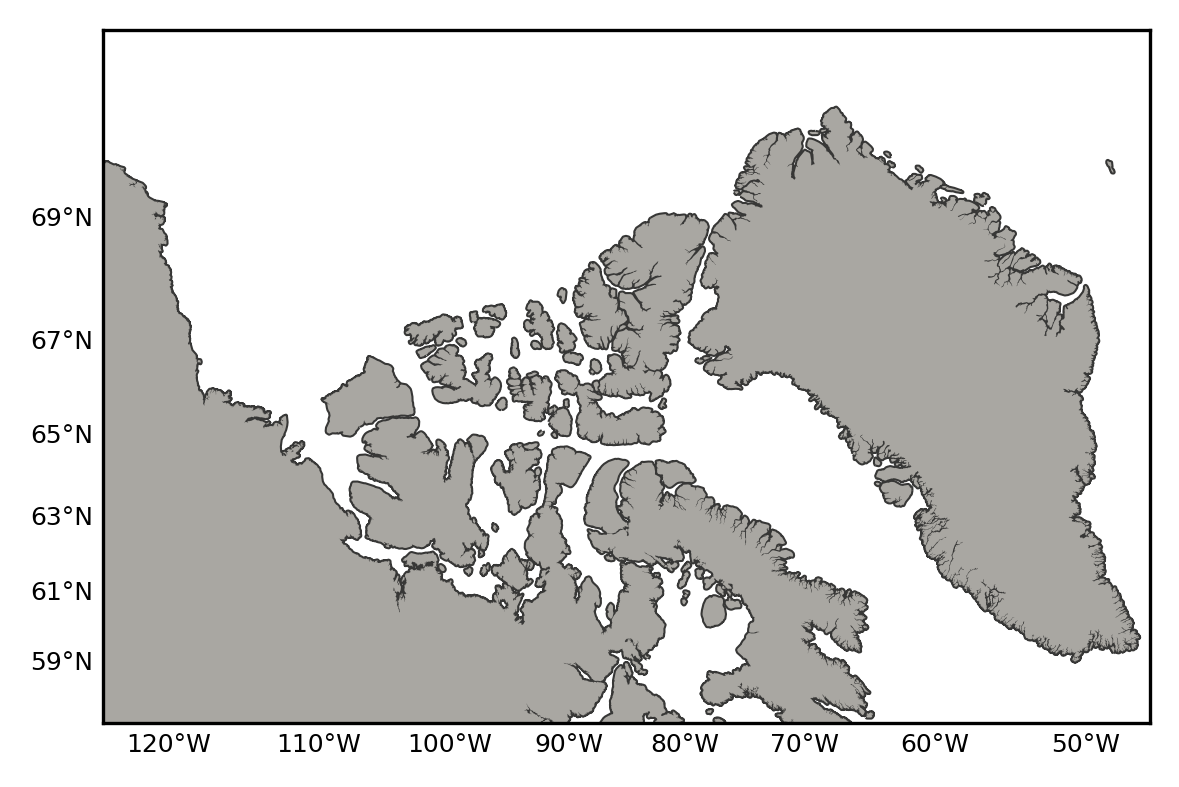

In [4]:
fig, ax1 = plt.subplots(figsize=(4.5, 3.74), dpi=300)

proj1 = Basemap(projection='stere',lat_0 = 77.1, lon_0 = -85, resolution='i', width=4.5e6, height=2.98e6, ax=ax1)
proj1.drawparallels(np.arange(int(59),int(90),2),labels=[1,0,0,0], linewidth=0.0, fontsize=6)
proj1.drawmeridians(np.arange(int(-140),int(-30),10),labels=[0,0,0,1], linewidth=0.0, fontsize=6)
proj1.drawcoastlines(color=land_outline_color, linewidth=1.0)
proj1.fillcontinents(color=land_color, lake_color=land_color, zorder=2);

# pickle the class instance.
pickle.dump((fig, ax1, proj1), open('/ocean/brogalla/GEOTRACES/pickles/mn-reference.pickle','wb'))

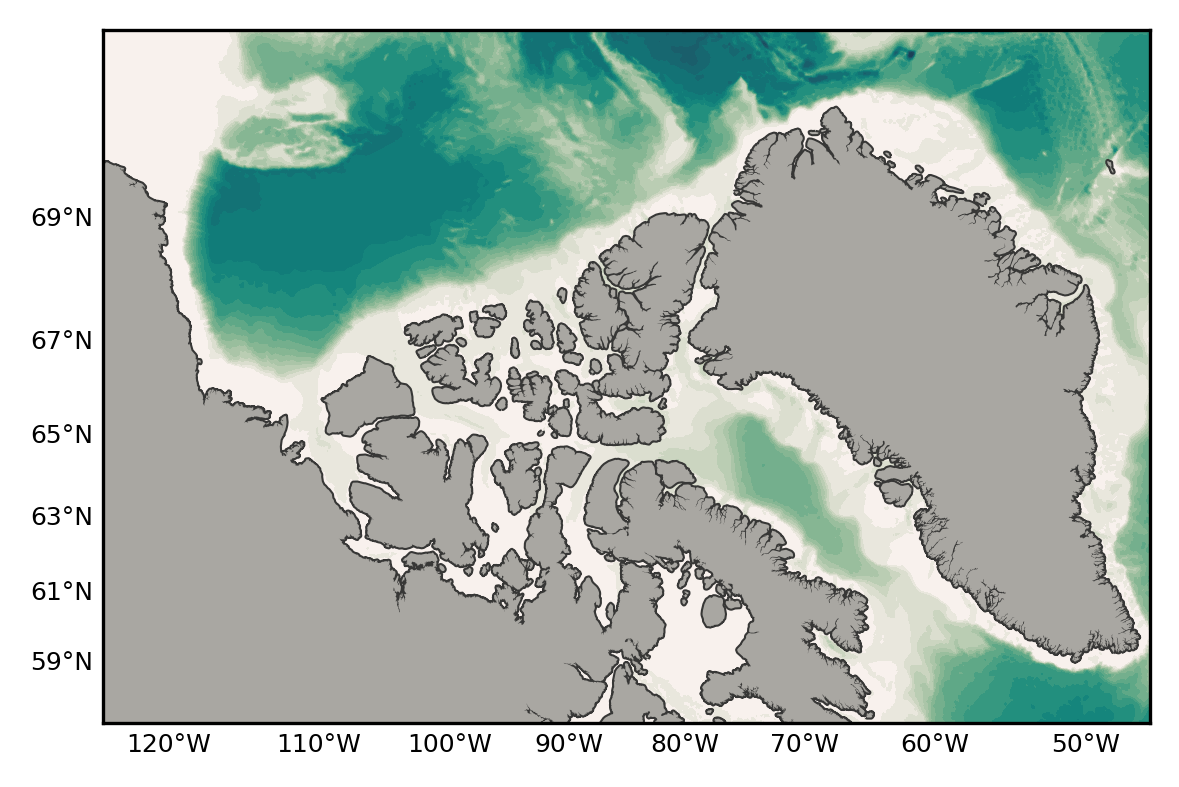

In [5]:
fig, ax1 = plt.subplots(figsize=(4.5, 3.74), dpi=300)

proj1 = Basemap(projection='stere',lat_0 = 77.1, lon_0 = -85, resolution='i', width=4.5e6, height=2.98e6, ax=ax1)
proj1.drawparallels(np.arange(int(59),int(90),2),labels=[1,0,0,0], linewidth=0.0, fontsize=6)
proj1.drawmeridians(np.arange(int(-140),int(-30),10),labels=[0,0,0,1], linewidth=0.0, fontsize=6)
proj1.drawcoastlines(color=land_outline_color, linewidth=1.0)
proj1.fillcontinents(color=land_color, lake_color=land_color, zorder=2);

x_model, y_model = proj1(lon, lat)
bath   = proj1.contourf(x_model, y_model, mesh_bathy, 20, cmap=cmocean.cm.tempo, vmin=0, vmax=6000, zorder=1)

# pickle the class instance.
pickle.dump((fig, ax1, proj1), open('/ocean/brogalla/GEOTRACES/pickles/surface-land-map.pickle','wb'))

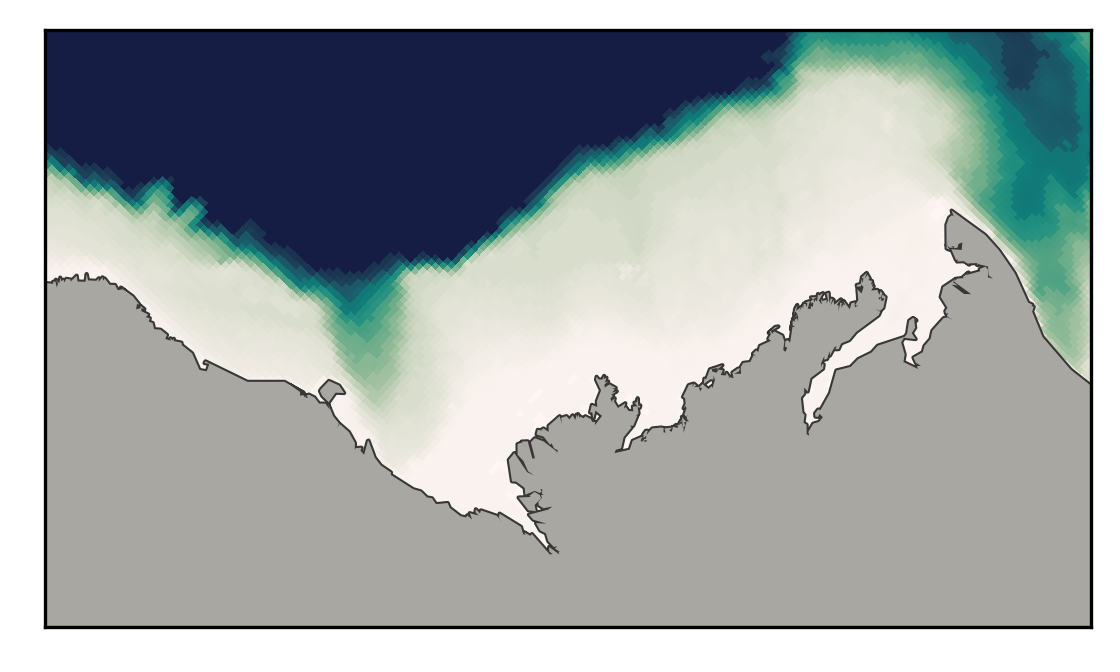

In [11]:
fig, ax1 = plt.subplots(figsize=(4.5, 3.74), dpi=300)

proj1 = Basemap(projection='stere',lat_0 = 70, lon_0 = -135, resolution='i', width=0.7e6, height=0.4e6, ax=ax1)
proj1.drawcoastlines(color=land_outline_color, linewidth=1.0)
proj1.fillcontinents(color=land_color, lake_color=land_color, zorder=2);

x_model, y_model = proj1(lon, lat)
bath   = proj1.pcolormesh(x_model, y_model, mesh_bathy, cmap=cmocean.cm.tempo, vmin=0, vmax=500, zorder=1)

# pickle the class instance.
# pickle.dump((fig, ax1, proj1), open('/ocean/brogalla/GEOTRACES/pickles/surface-land-map.pickle','wb'))

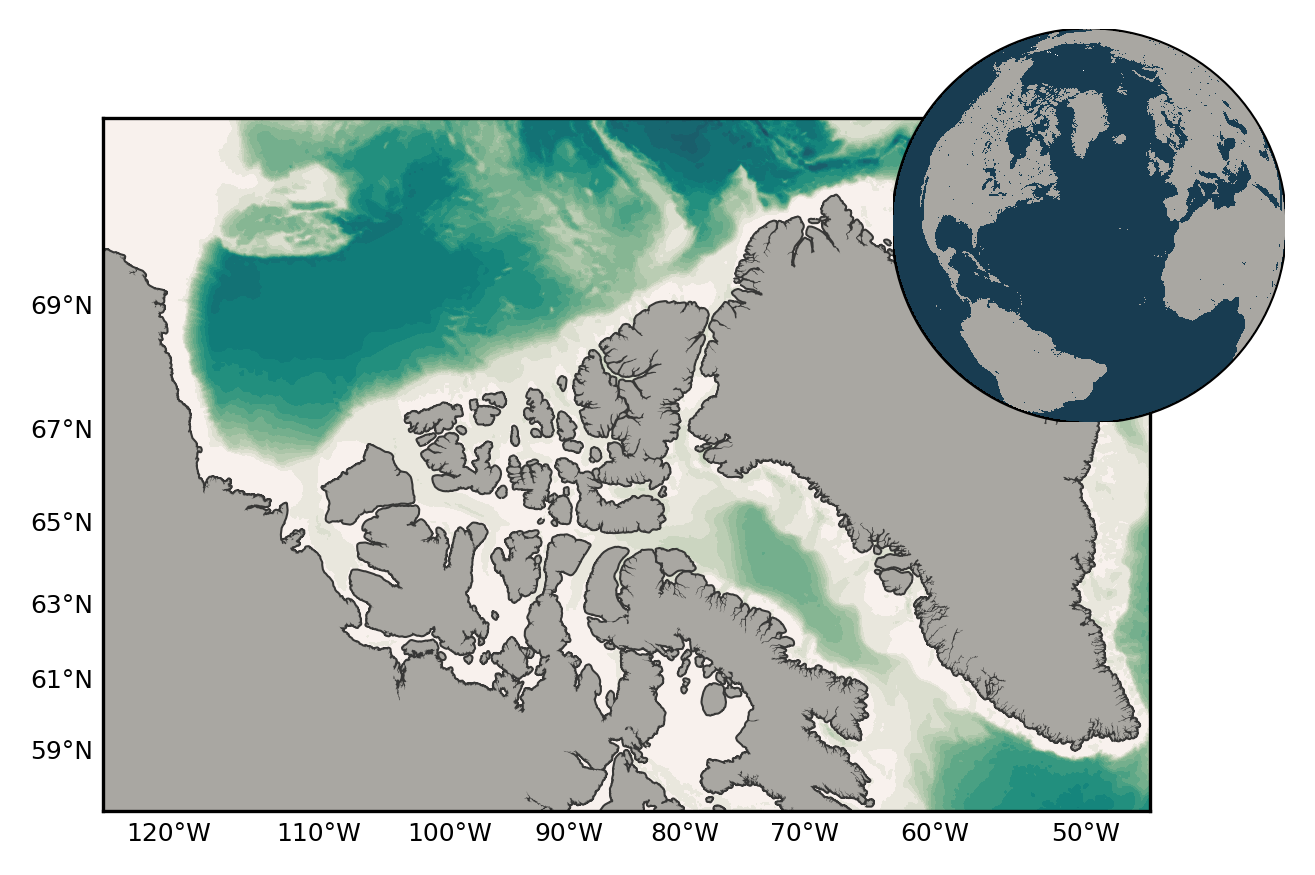

In [9]:
fig, ax1 = plt.subplots(figsize=(4.5, 3.74), dpi=300)

proj1 = Basemap(projection='stere',lat_0 = 77.1, lon_0 = -85, resolution='i', width=4.5e6, height=2.98e6, ax=ax1)
proj1.drawparallels(np.arange(int(59),int(90),2),labels=[1,0,0,0], linewidth=0.0, fontsize=6)
proj1.drawmeridians(np.arange(int(-140),int(-30),10),labels=[0,0,0,1], linewidth=0.0, fontsize=6)
proj1.drawcoastlines(color=land_outline_color, linewidth=1.0)
proj1.fillcontinents(color=land_color, lake_color=land_color, zorder=2);

x_model, y_model = proj1(lon, lat)
bath   = proj1.contourf(x_model, y_model, mesh_bathy, 20, cmap=cmocean.cm.tempo, vmin=0, vmax=6000, zorder=1)

ax2   = fig.add_axes([0.68, 0.54, 0.35, 0.35])
proj2 = Basemap(projection='ortho',lon_0=-40,lat_0=40, resolution='h', ax=ax2)
proj2.drawmapboundary(fill_color='white')
proj2.drawlsmask(land_color = land_color, ocean_color="#183C51", resolution = 'h',zorder=2) 

# pickle the class instance.
pickle.dump((fig, ax1, proj1, ax2, proj2), open('/ocean/brogalla/GEOTRACES/pickles/surface-land-map-globe.pickle','wb'))

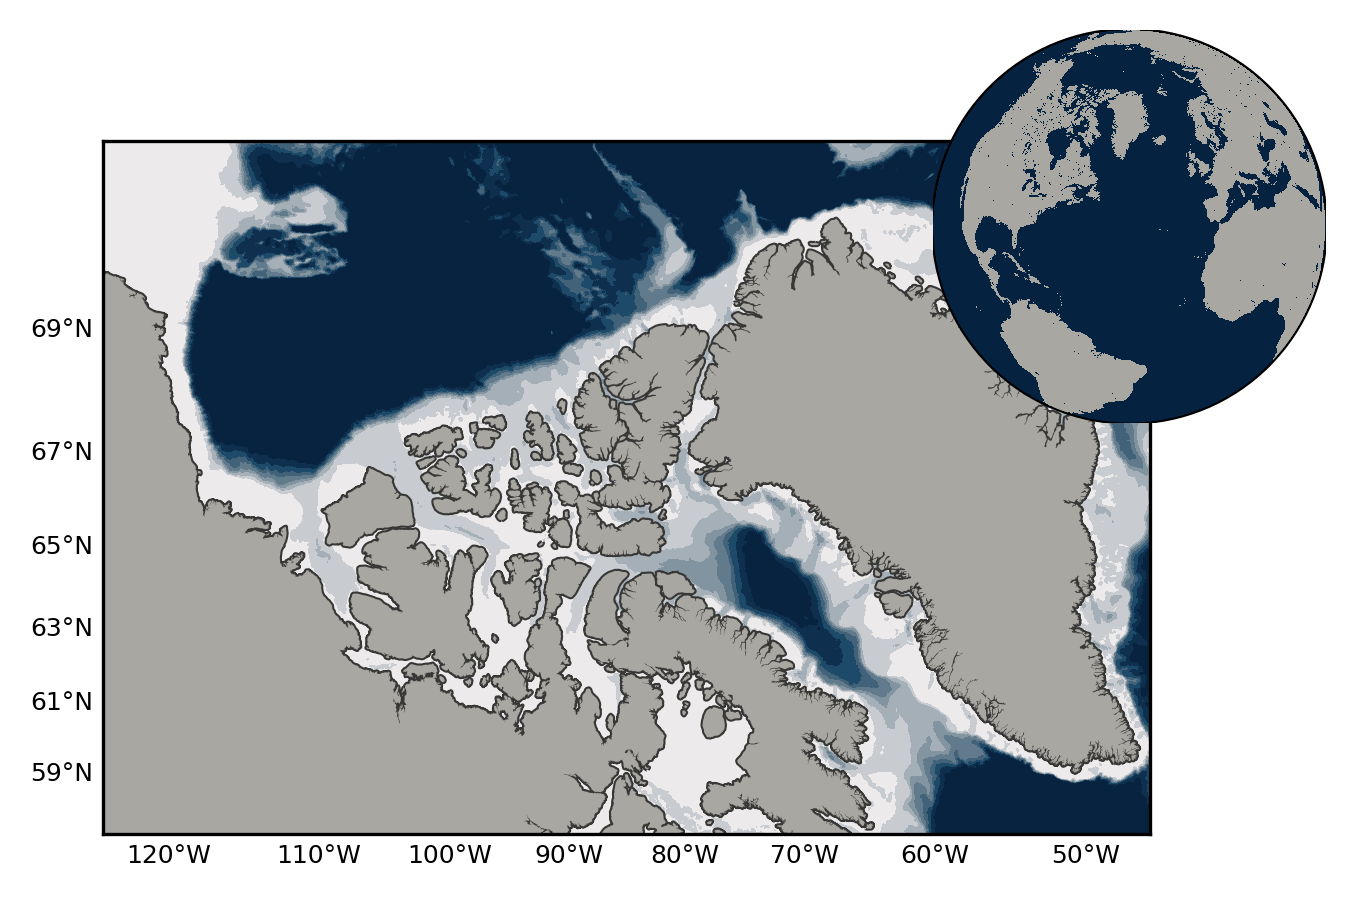

In [14]:
fig, ax1 = plt.subplots(figsize=(4.5, 3.74), dpi=300)

proj1 = Basemap(projection='stere',lat_0 = 77.1, lon_0 = -85, resolution='i', width=4.5e6, height=2.98e6, ax=ax1)
proj1.drawparallels(np.arange(int(59),int(90),2),labels=[1,0,0,0], linewidth=0.0, fontsize=6)
proj1.drawmeridians(np.arange(int(-140),int(-30),10),labels=[0,0,0,1], linewidth=0.0, fontsize=6)
proj1.drawcoastlines(color=land_outline_color, linewidth=1.0)
proj1.fillcontinents(color=land_color, lake_color=land_color, zorder=2);

x_model, y_model = proj1(lon, lat)
bath   = proj1.contourf(x_model, y_model, mesh_bathy, 20, cmap=cmocean.cm.diff_r, vmin=-2000, vmax=2000, zorder=1)

ax2   = fig.add_axes([0.71, 0.56, 0.35, 0.35])
proj2 = Basemap(projection='ortho',lon_0=-40,lat_0=40, resolution='h', ax=ax2)
proj2.drawmapboundary(fill_color='white')
proj2.drawlsmask(land_color = land_color, ocean_color="#052340", resolution = 'h',zorder=2) 

# pickle the class instance.
pickle.dump((fig, ax1, proj1, ax2, proj2), open('/ocean/brogalla/GEOTRACES/pickles/rivers-map-globe.pickle','wb'))

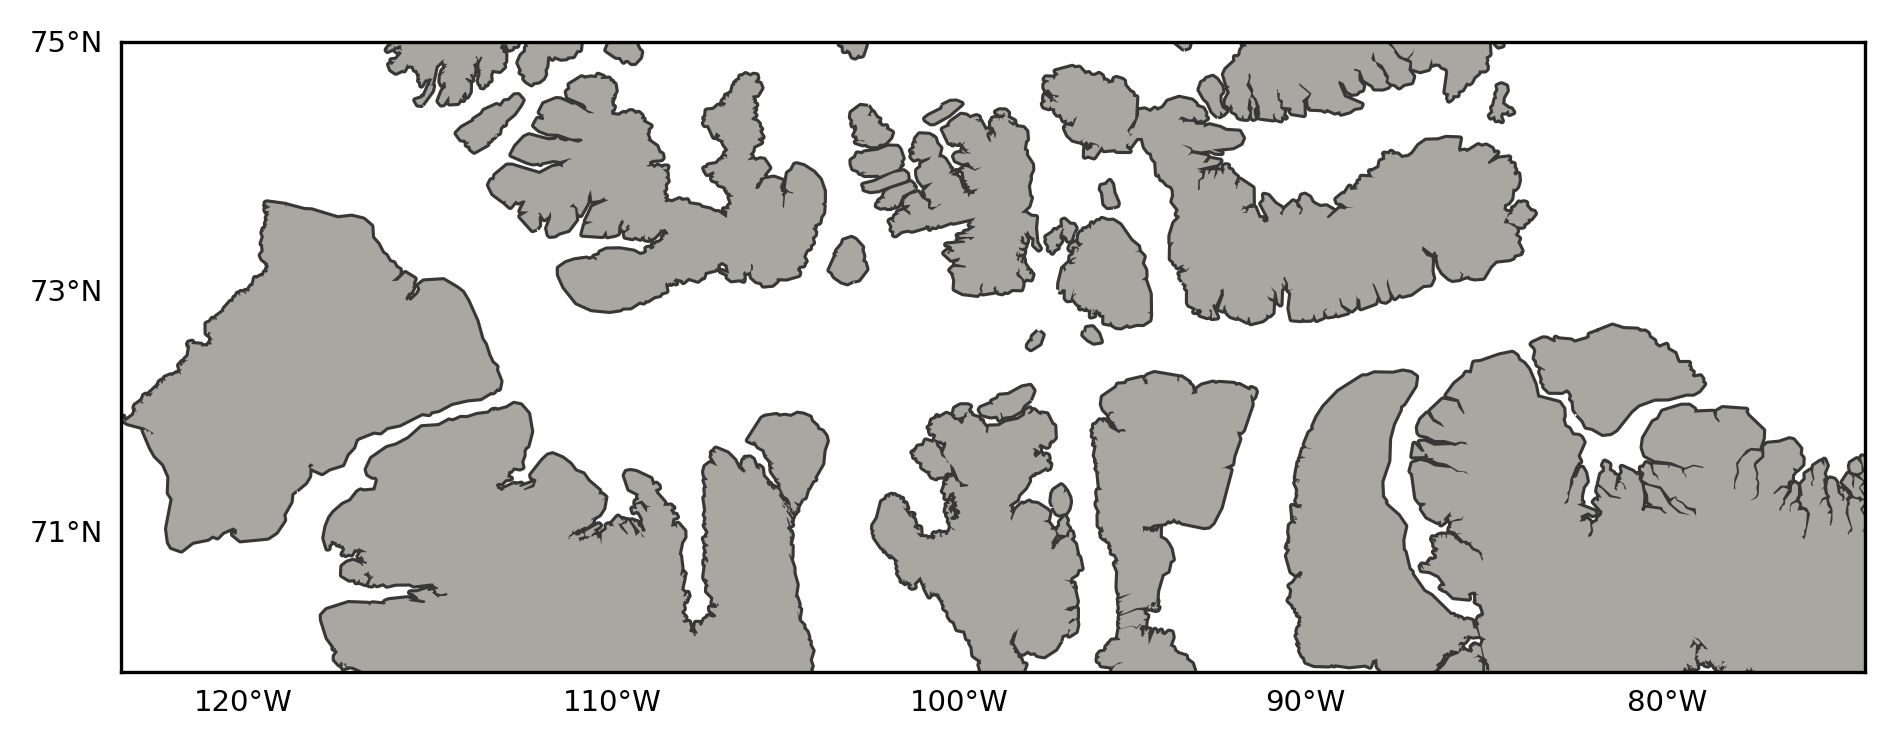

In [5]:
fig, ax1 = plt.subplots(figsize=(7.5, 3), dpi=300)

proj1 = Basemap(projection='stere',lat_0 = 74.4, lon_0 = -99, resolution='i', width=1.8e6, height=0.65e6, ax=ax1)
proj1.drawparallels(np.arange(int(59),int(90),2),labels=[1,0,0,0], linewidth=0.0, fontsize=7)
proj1.drawmeridians(np.arange(int(-140),int(-30),10),labels=[0,0,0,1], linewidth=0.0, fontsize=7)
proj1.drawcoastlines(color=land_outline_color, linewidth=1.5)
proj1.fillcontinents(color=land_color, lake_color=land_color, zorder=2);

# pickle the class instance.
pickle.dump((fig, ax1, proj1), open('/ocean/brogalla/GEOTRACES/pickles/parry-channel.pickle','wb'))

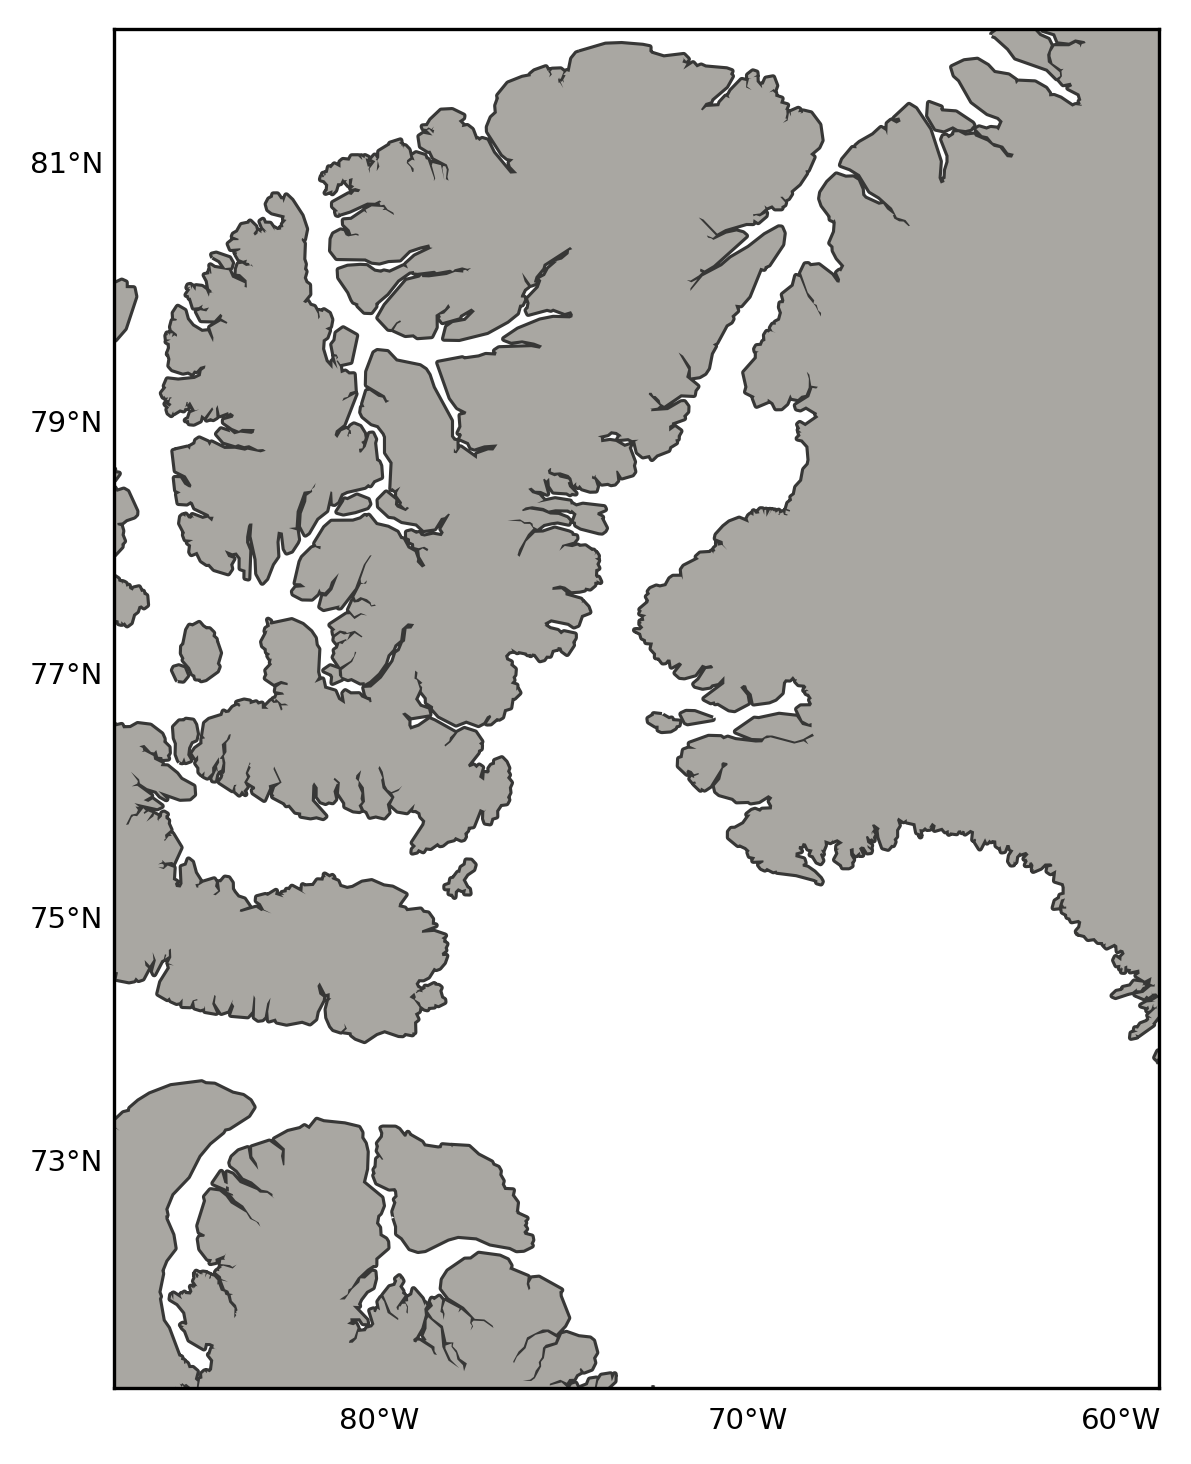

In [4]:
fig, ax1 = plt.subplots(figsize=(5, 6), dpi=300)

proj1 = Basemap(projection='stere',lat_0 = 77.5, lon_0 = -73, resolution='i', width=1.0e6, height=1.3e6, ax=ax1)
proj1.drawparallels(np.arange(int(59),int(90),2),labels=[1,0,0,0], linewidth=0.0, fontsize=7)
proj1.drawmeridians(np.arange(int(-140),int(-30),10),labels=[0,0,0,1], linewidth=0.0, fontsize=7)
proj1.drawcoastlines(color=land_outline_color, linewidth=1.5)
proj1.fillcontinents(color=land_color, lake_color=land_color, zorder=2);

# pickle the class instance.
pickle.dump((fig, ax1, proj1), open('/ocean/brogalla/GEOTRACES/pickles/nares-strait.pickle','wb'))

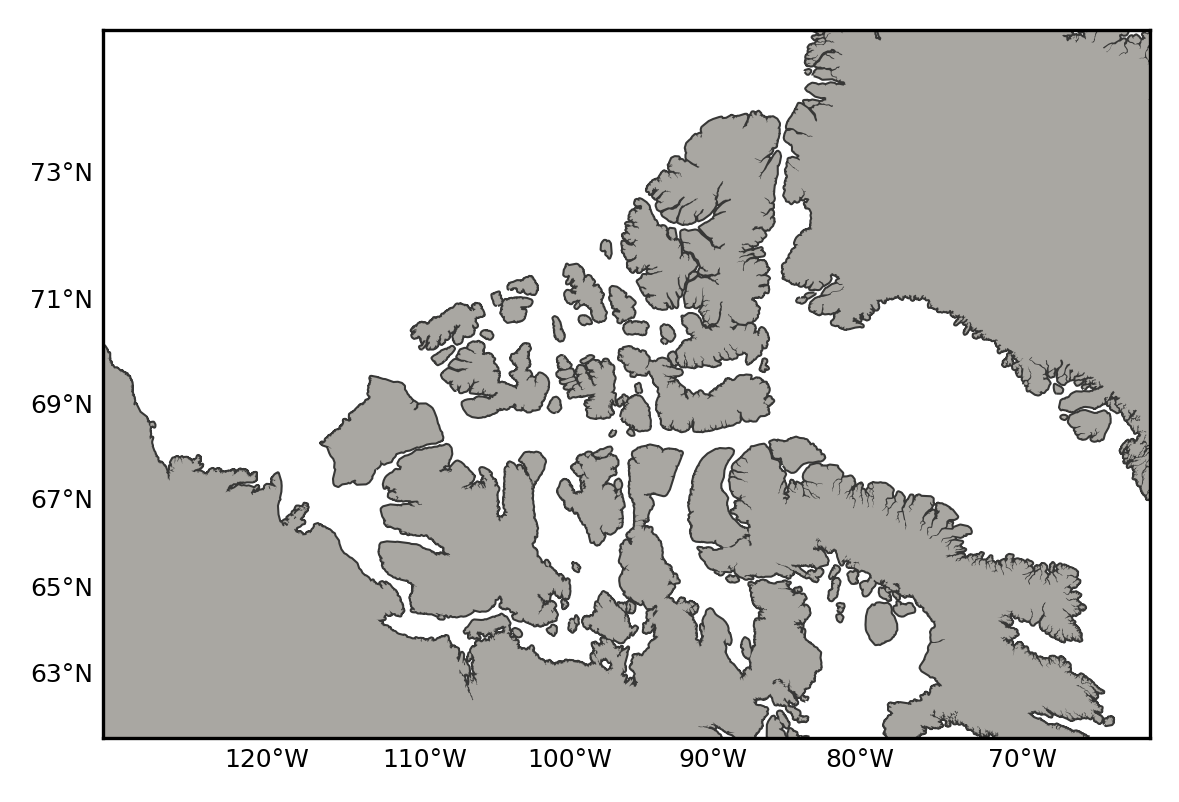

In [7]:
fig, ax1 = plt.subplots(figsize=(4.5, 3.74), dpi=300)

proj1 = Basemap(projection='stere',lat_0 = 76, lon_0 = -96, resolution='i', width=3.4e6, height=2.3e6, ax=ax1)
proj1.drawparallels(np.arange(int(59),int(90),2),labels=[1,0,0,0], linewidth=0.0, fontsize=6)
proj1.drawmeridians(np.arange(int(-140),int(-30),10),labels=[0,0,0,1], linewidth=0.0, fontsize=6)
proj1.drawcoastlines(color=land_outline_color, linewidth=1.0)
proj1.fillcontinents(color=land_color, lake_color=land_color, zorder=2);

# pickle the class instance.
pickle.dump((fig, ax1, proj1), open('/ocean/brogalla/GEOTRACES/pickles/rivers-CAA.pickle','wb'))

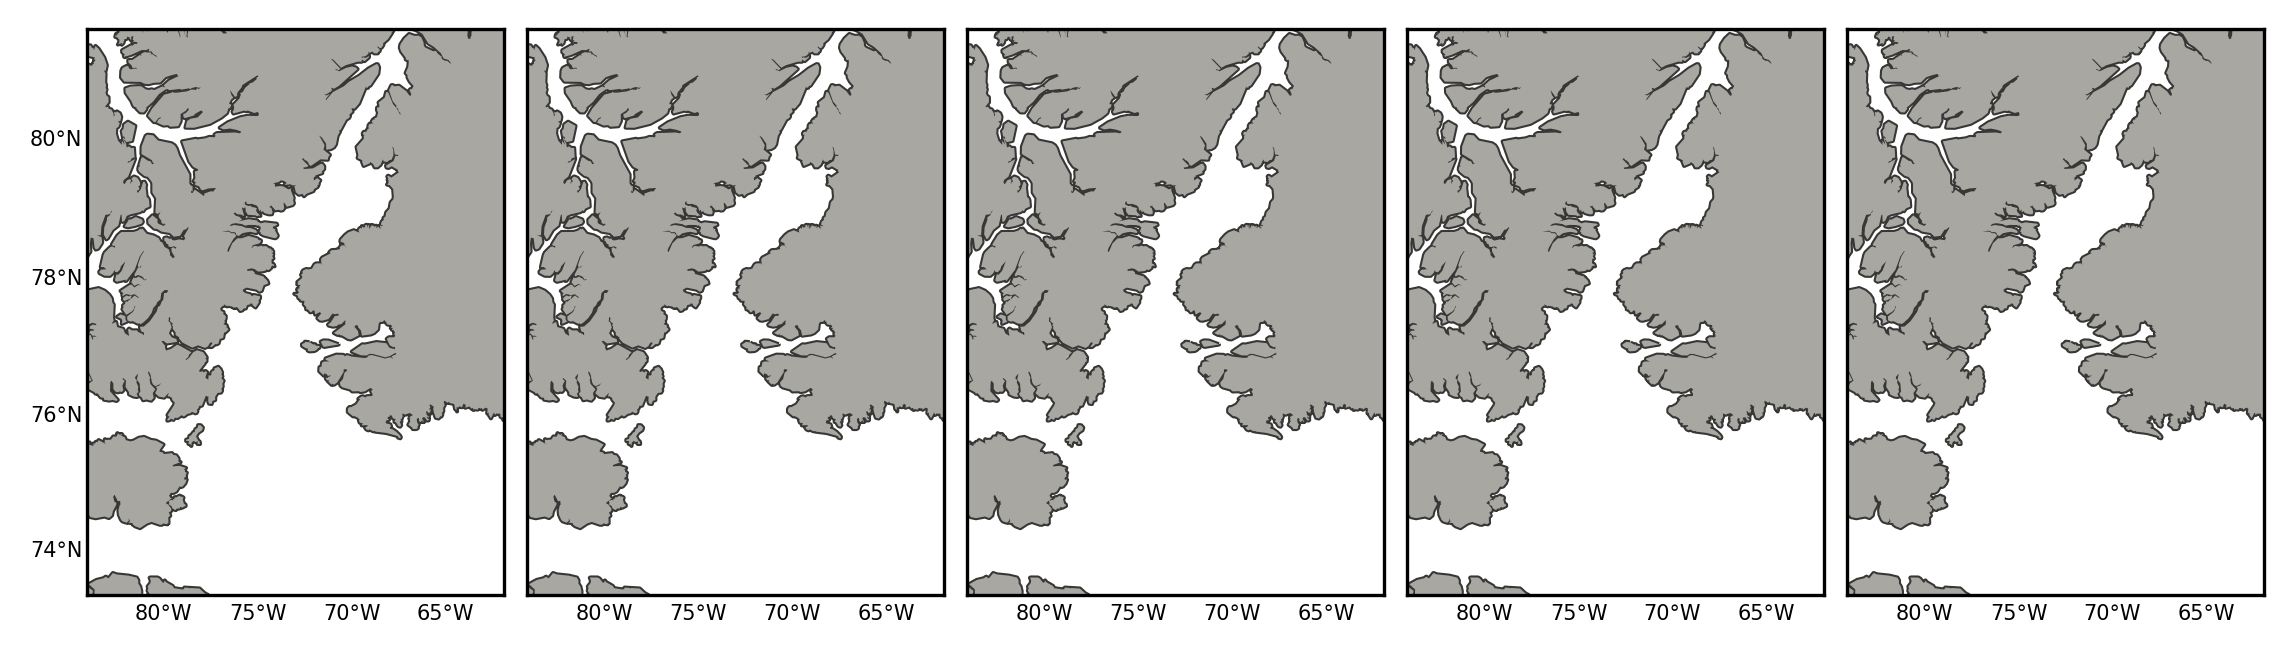

In [10]:
fig, ax = plt.subplots(1,5,figsize=(7.5, 3.74), dpi=300)

for i, axis in enumerate(ax.ravel()):
    proj1 = Basemap(projection='stere',lat_0 = 77.9, lon_0 = -73, resolution='i', width=0.7e6, height=0.95e6, ax=axis)
    proj1.drawmeridians(np.arange(int(-140),int(-30),5),labels=[0,0,0,1], linewidth=0.0, fontsize=5)
    proj1.drawcoastlines(color=land_outline_color, linewidth=1.0)
    proj1.fillcontinents(color=land_color, lake_color=land_color, zorder=2)
    
    if i==0:
        proj1.drawparallels(np.arange(int(60),int(90),2),labels=[1,0,0,0], linewidth=0.0, fontsize=5)

fig.tight_layout(pad=0.2)

# pickle the class instance.
pickle.dump((fig, ax, proj1), open('/ocean/brogalla/GEOTRACES/pickles/polynya.pickle','wb'))

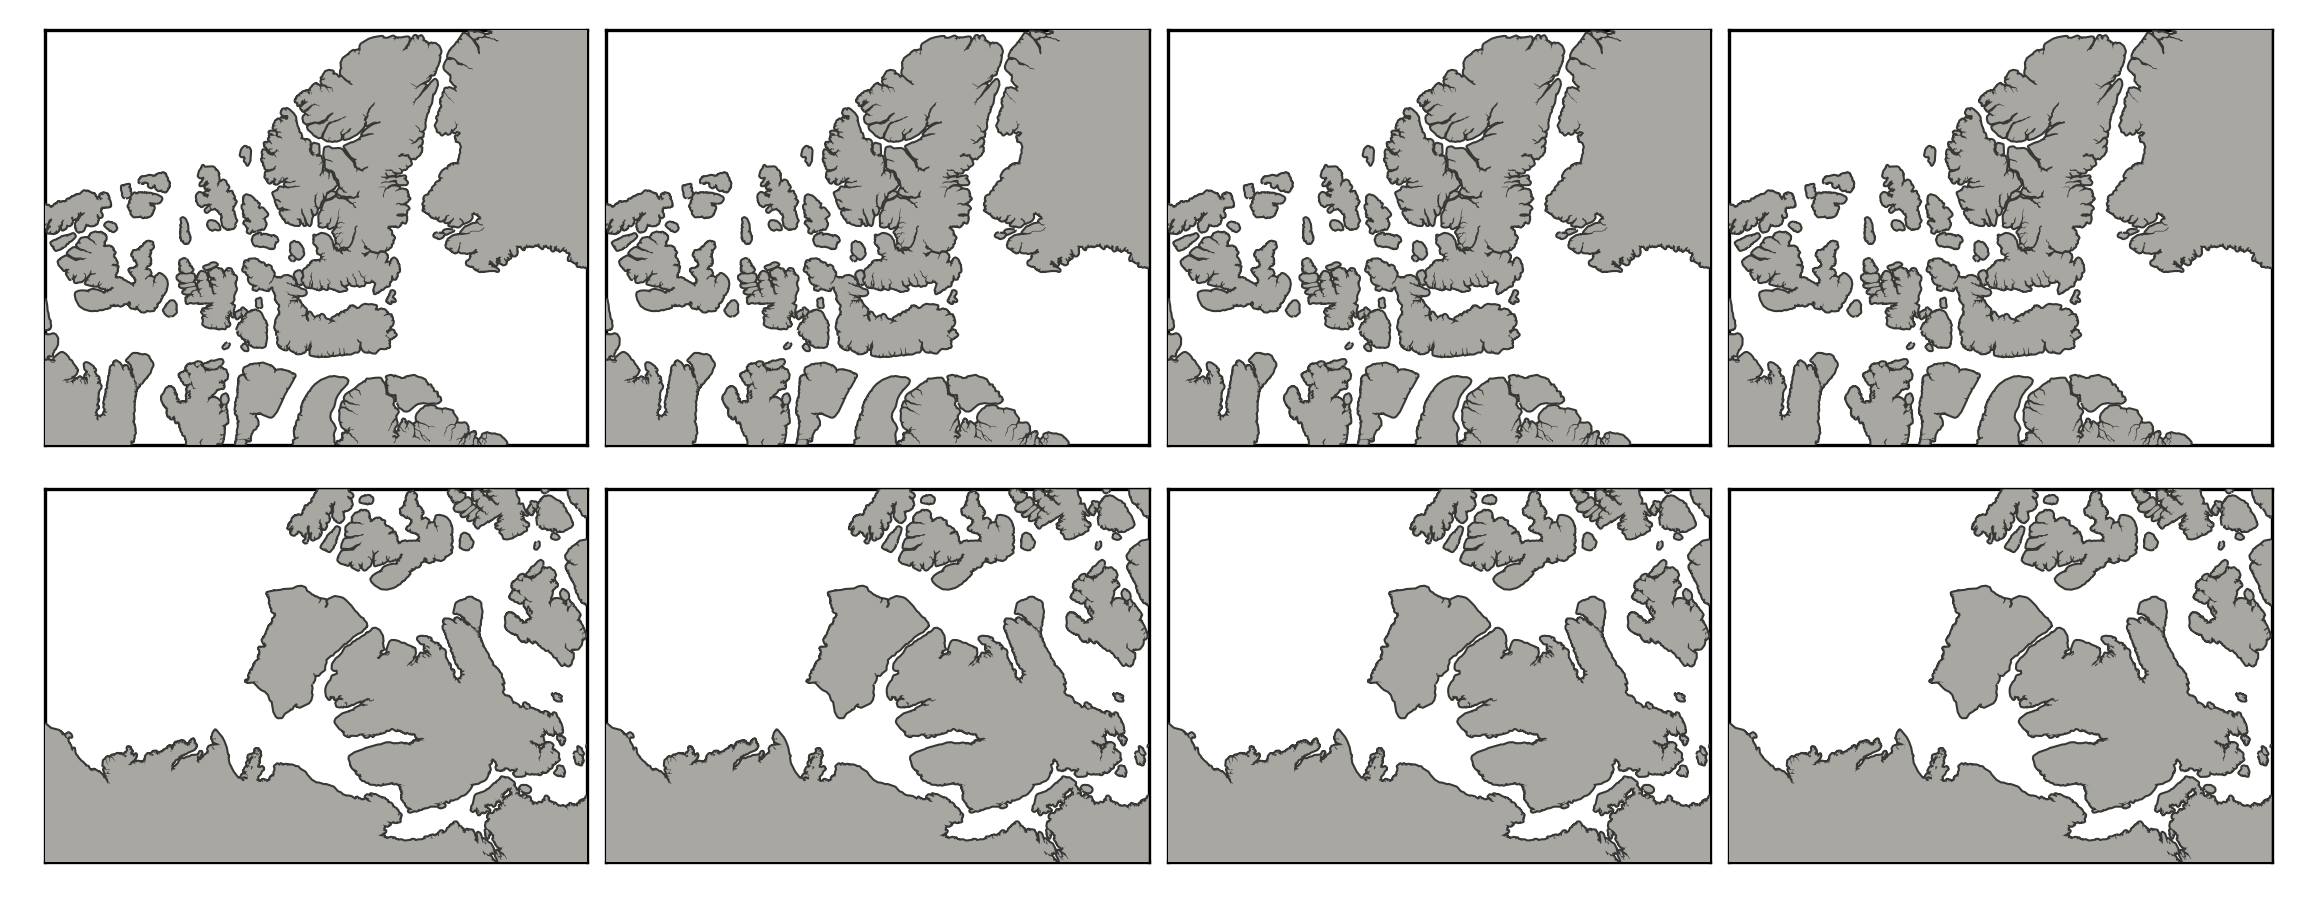

In [17]:
fig, ax = plt.subplots(2,4,figsize=(7.5, 3), dpi=300)

for axis in ax[0,:].ravel():
    proj1 = Basemap(projection='stere',lat_0 = 77.8, lon_0 = -88, resolution='i', width=1.7e6, height=1.3e6, ax=axis)
#     proj1.drawmeridians(np.arange(int(-140),int(-30),10),labels=[0,0,0,1], linewidth=0.0, fontsize=5)
    proj1.drawcoastlines(color=land_outline_color, linewidth=1.0, zorder=4)
    proj1.fillcontinents(color=land_color, lake_color=land_color, zorder=5)
    
for axis in ax[1,:].ravel():
    proj2 = Basemap(projection='stere',lat_0 = 72.2, lon_0 = -120, resolution='i', width=1.6e6, height=1.1e6, ax=axis)
#     proj1.drawmeridians(np.arange(int(-140),int(-30),10),labels=[0,0,0,1], linewidth=0.0, fontsize=5)
    proj2.drawcoastlines(color=land_outline_color, linewidth=1.0, zorder=4)
    proj2.fillcontinents(color=land_color, lake_color=land_color, zorder=5)
    
fig.tight_layout(pad=0.1)

# pickle the class instance.
pickle.dump((fig, ax, proj1, proj2), open('/ocean/brogalla/GEOTRACES/pickles/rivers-seasonal.pickle','wb'))

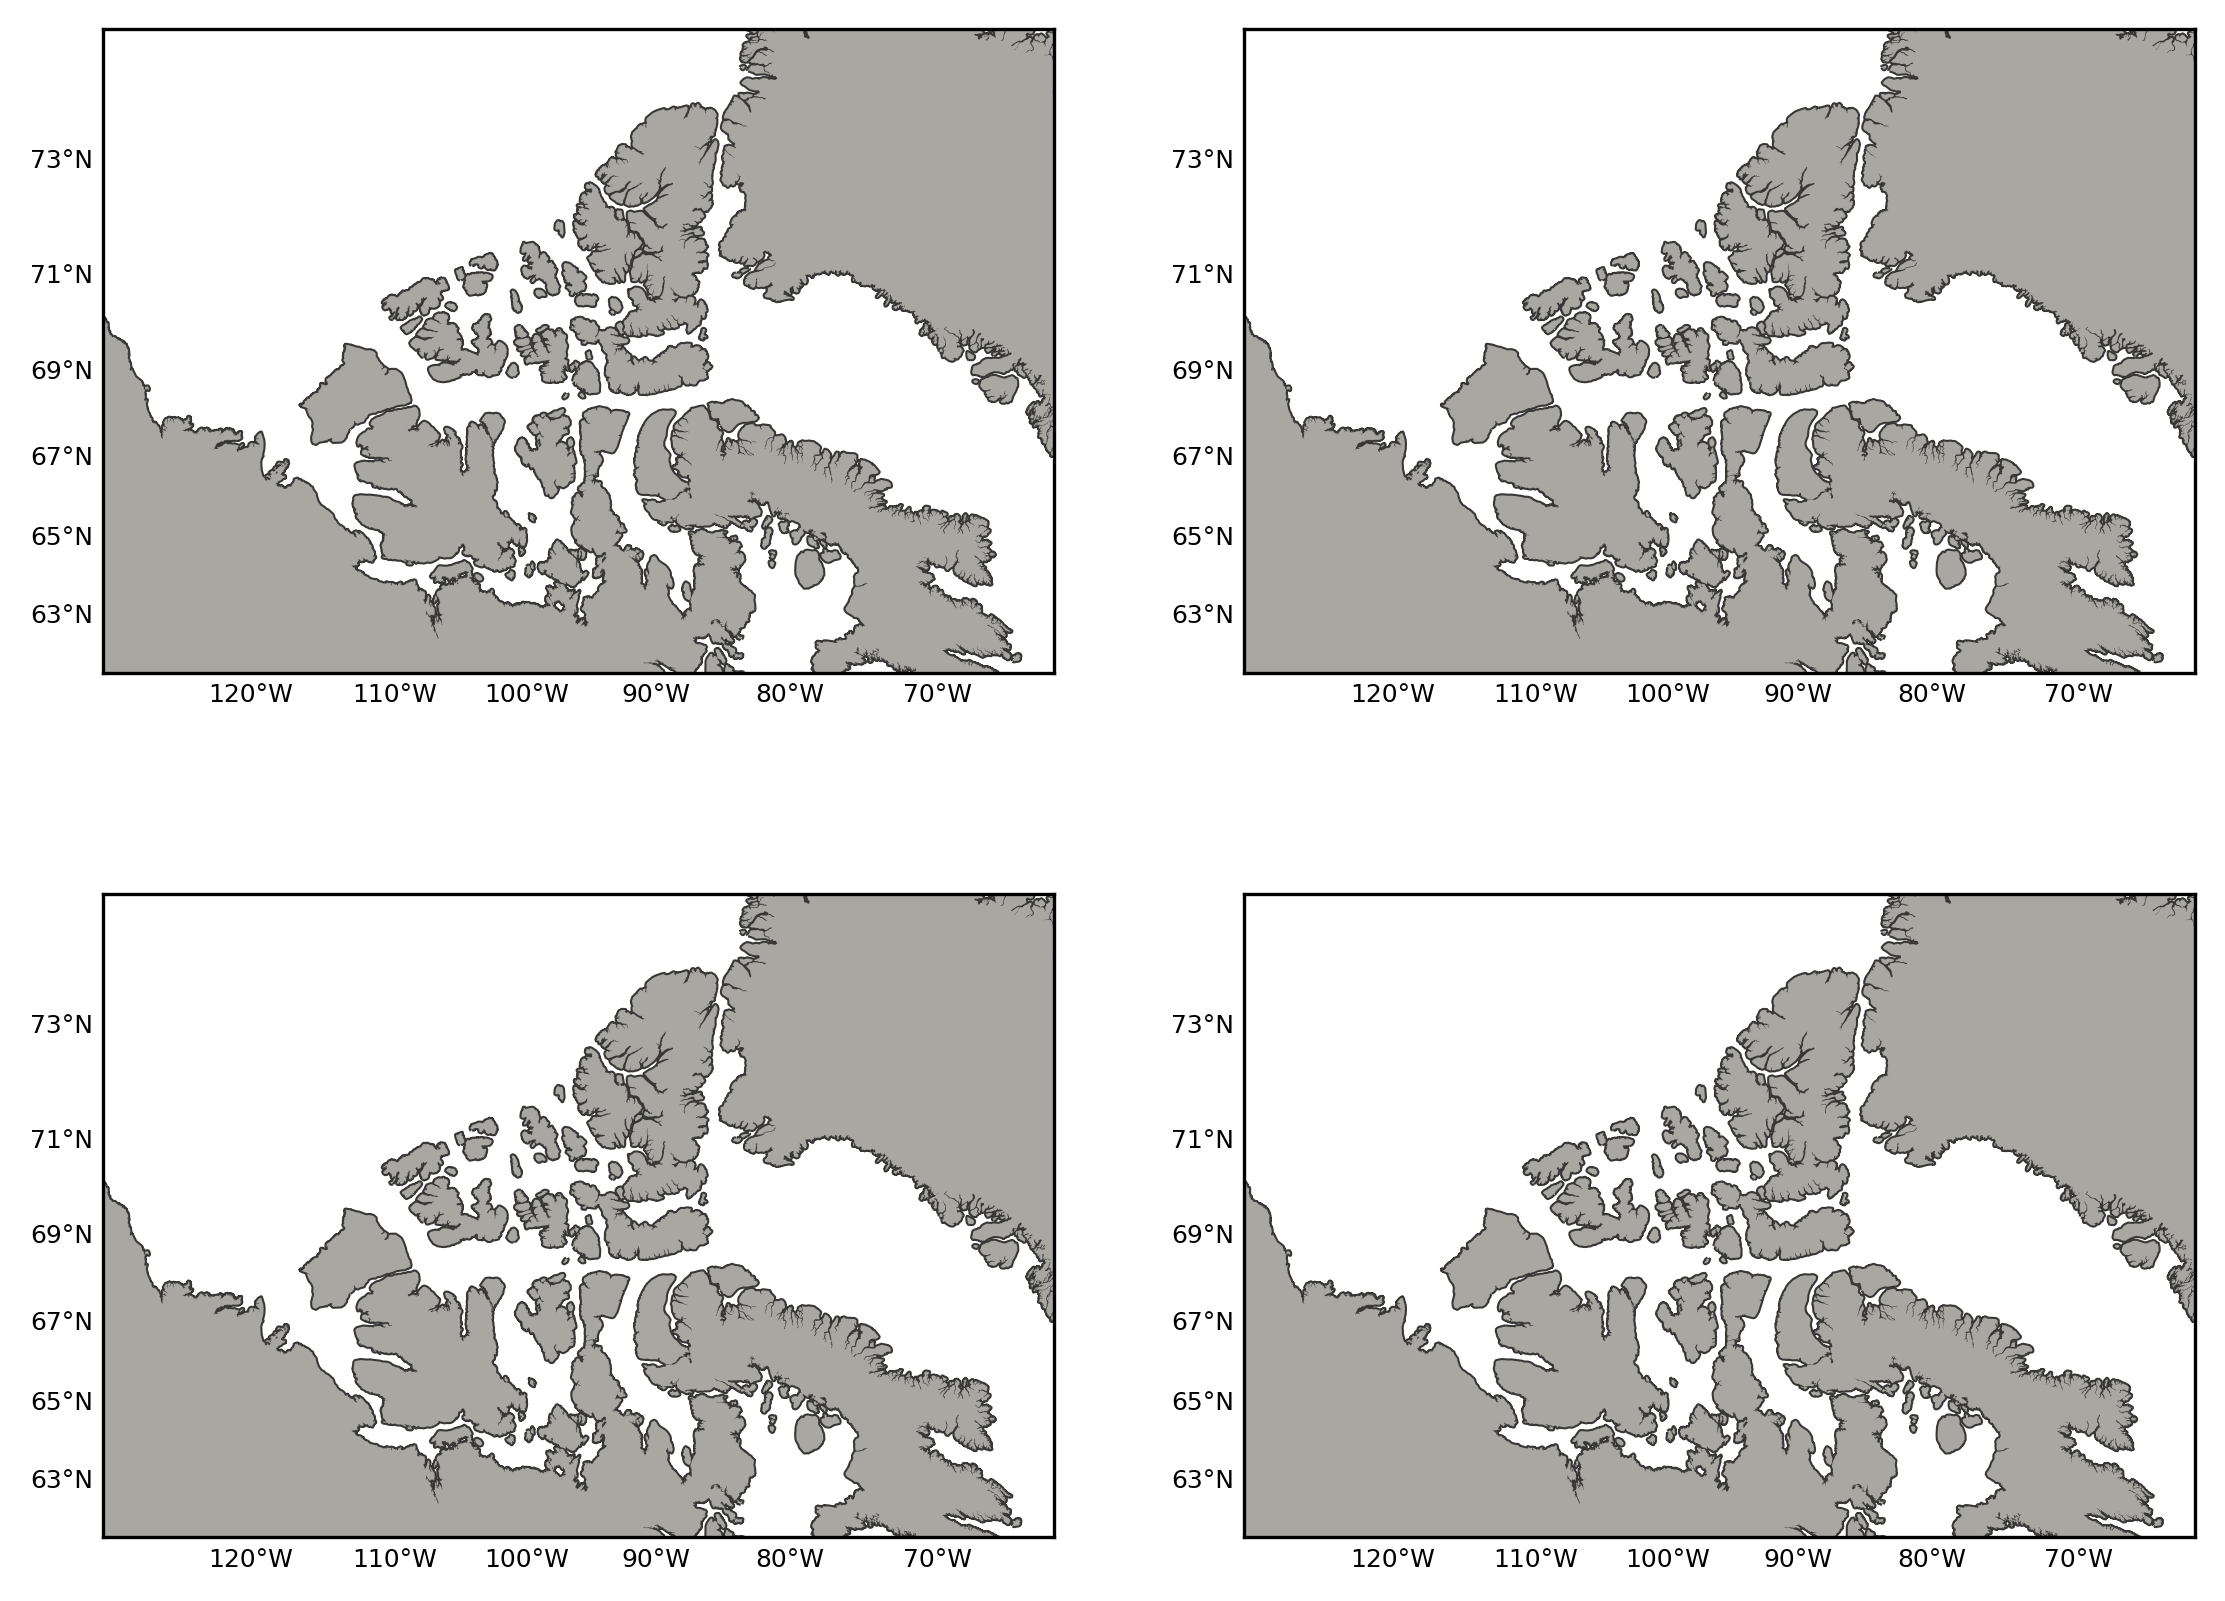

In [9]:
fig, ax = plt.subplots(2,2, figsize=(9, 7), dpi=300)

for axis in ax.ravel():
    proj1 = Basemap(projection='stere',lat_0 = 76, lon_0 = -96, resolution='i', width=3.4e6, height=2.3e6, ax=axis)
    proj1.drawparallels(np.arange(int(59),int(90),2),labels=[1,0,0,0], linewidth=0.0, fontsize=6)
    proj1.drawmeridians(np.arange(int(-140),int(-30),10),labels=[0,0,0,1], linewidth=0.0, fontsize=6)
    proj1.drawcoastlines(color=land_outline_color, linewidth=1.0)
    proj1.fillcontinents(color=land_color, lake_color=land_color, zorder=2);

# pickle the class instance.
pickle.dump((fig, ax, proj1), open('/ocean/brogalla/GEOTRACES/pickles/rivers-CAA.pickle','wb'))

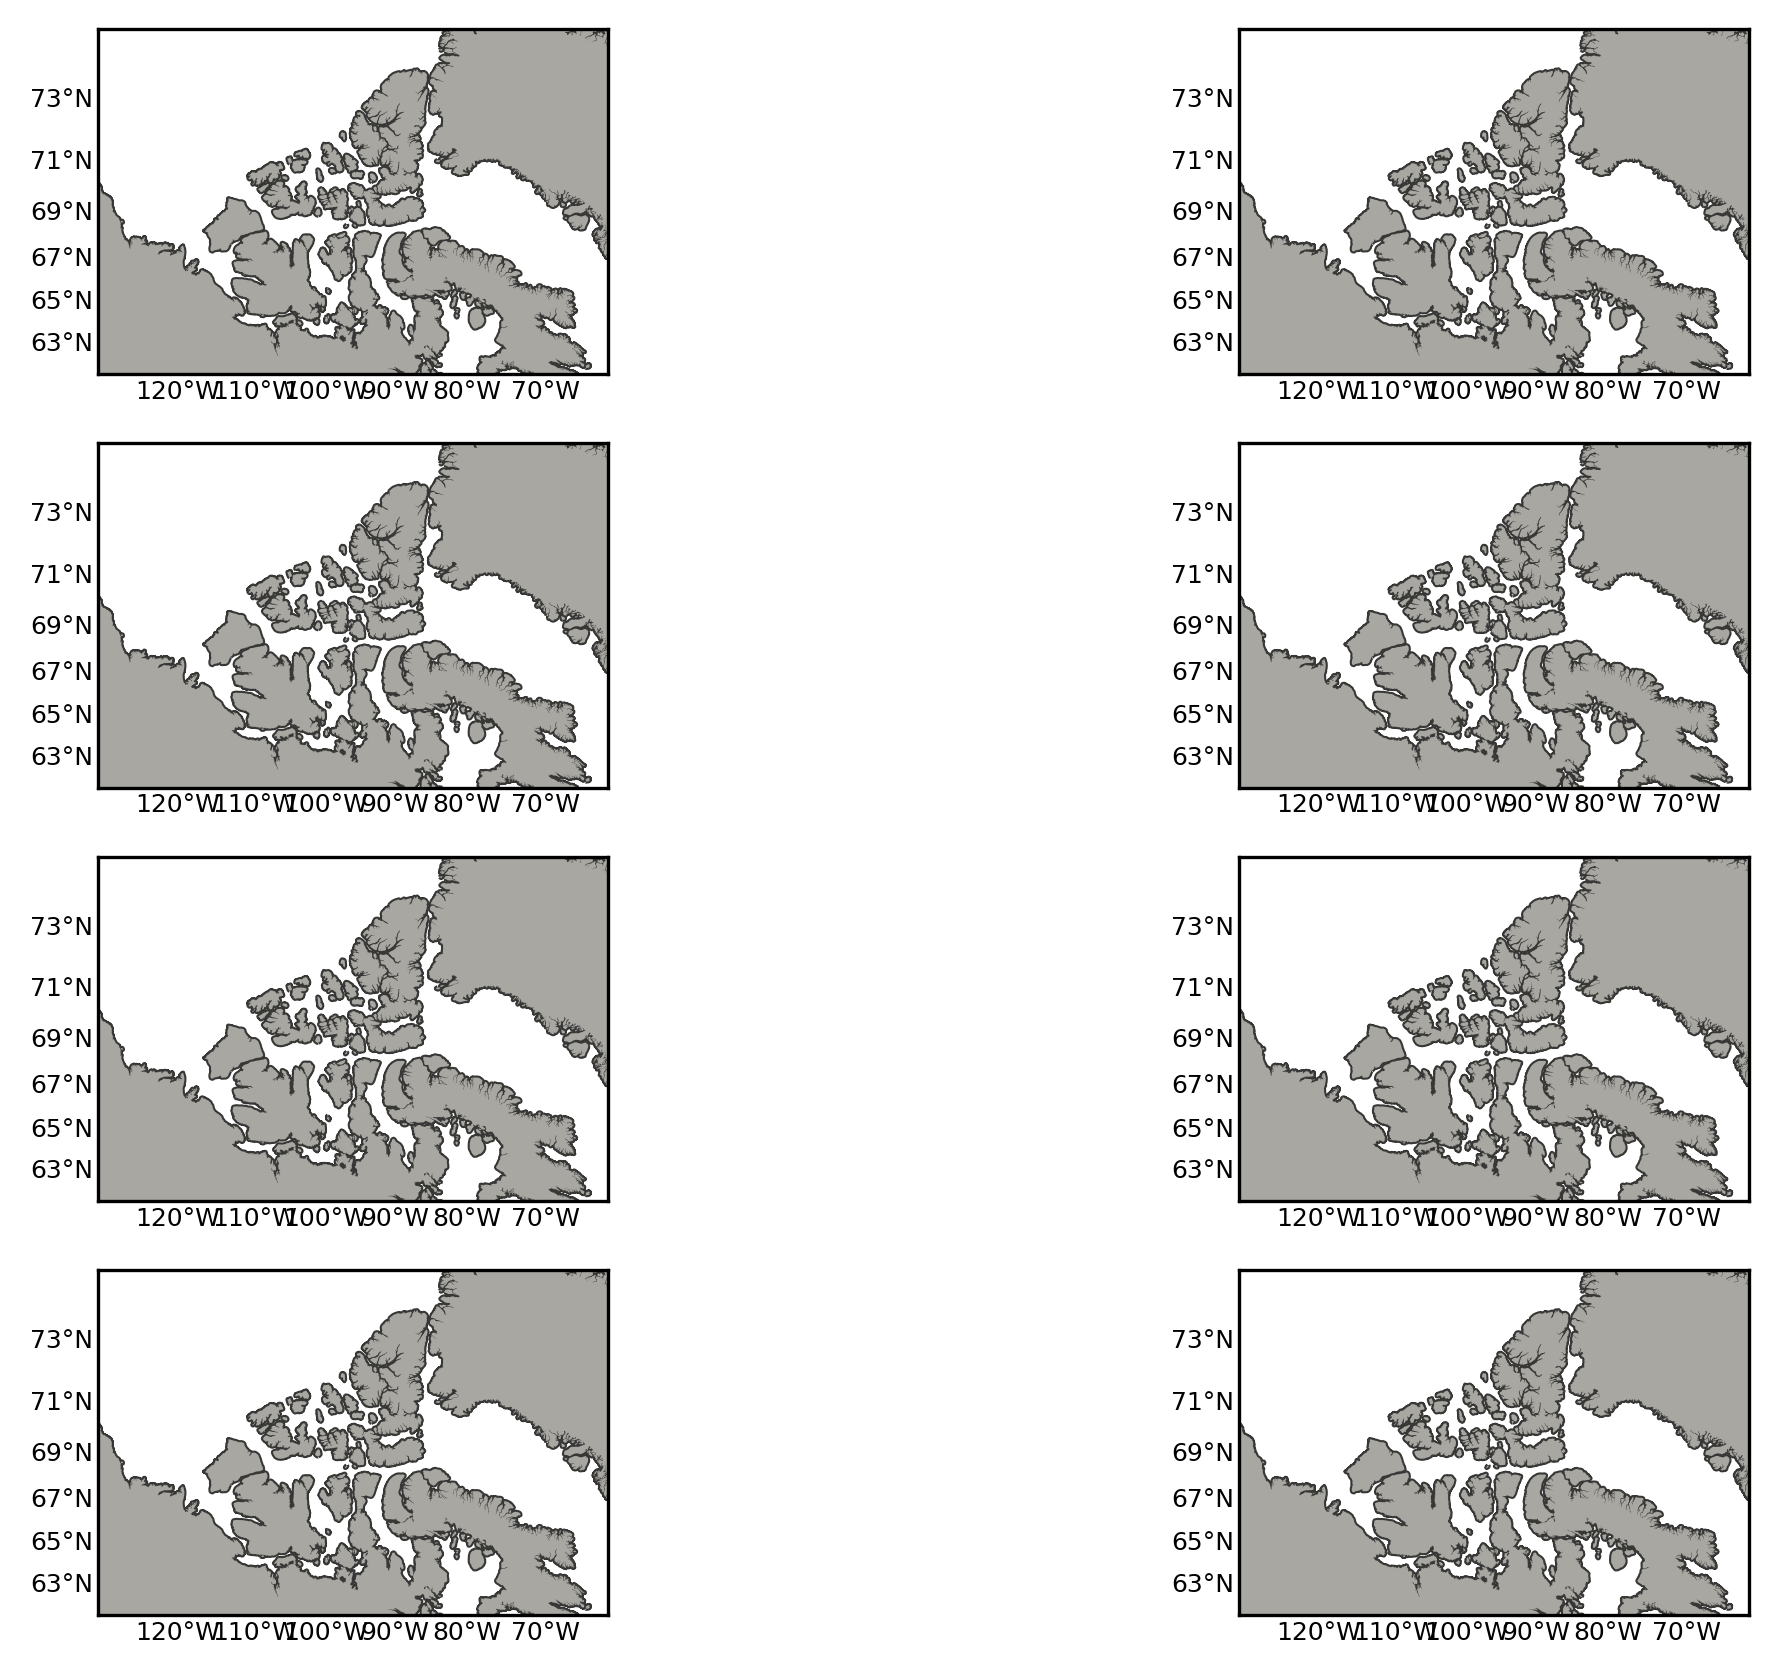

In [5]:
fig, ax = plt.subplots(4,2, figsize=(9, 4.5), dpi=300)

for axis in ax.ravel():
    proj1 = Basemap(projection='stere',lat_0 = 76, lon_0 = -96, resolution='i', width=3.4e6, height=2.3e6, ax=axis)
    proj1.drawcoastlines(color=land_outline_color, linewidth=1.0)
    proj1.fillcontinents(color=land_color, lake_color=land_color, zorder=2);

# pickle the class instance.
# pickle.dump((fig, ax, proj1), open('/ocean/brogalla/GEOTRACES/pickles/side-by-side-CAA.pickle','wb'))

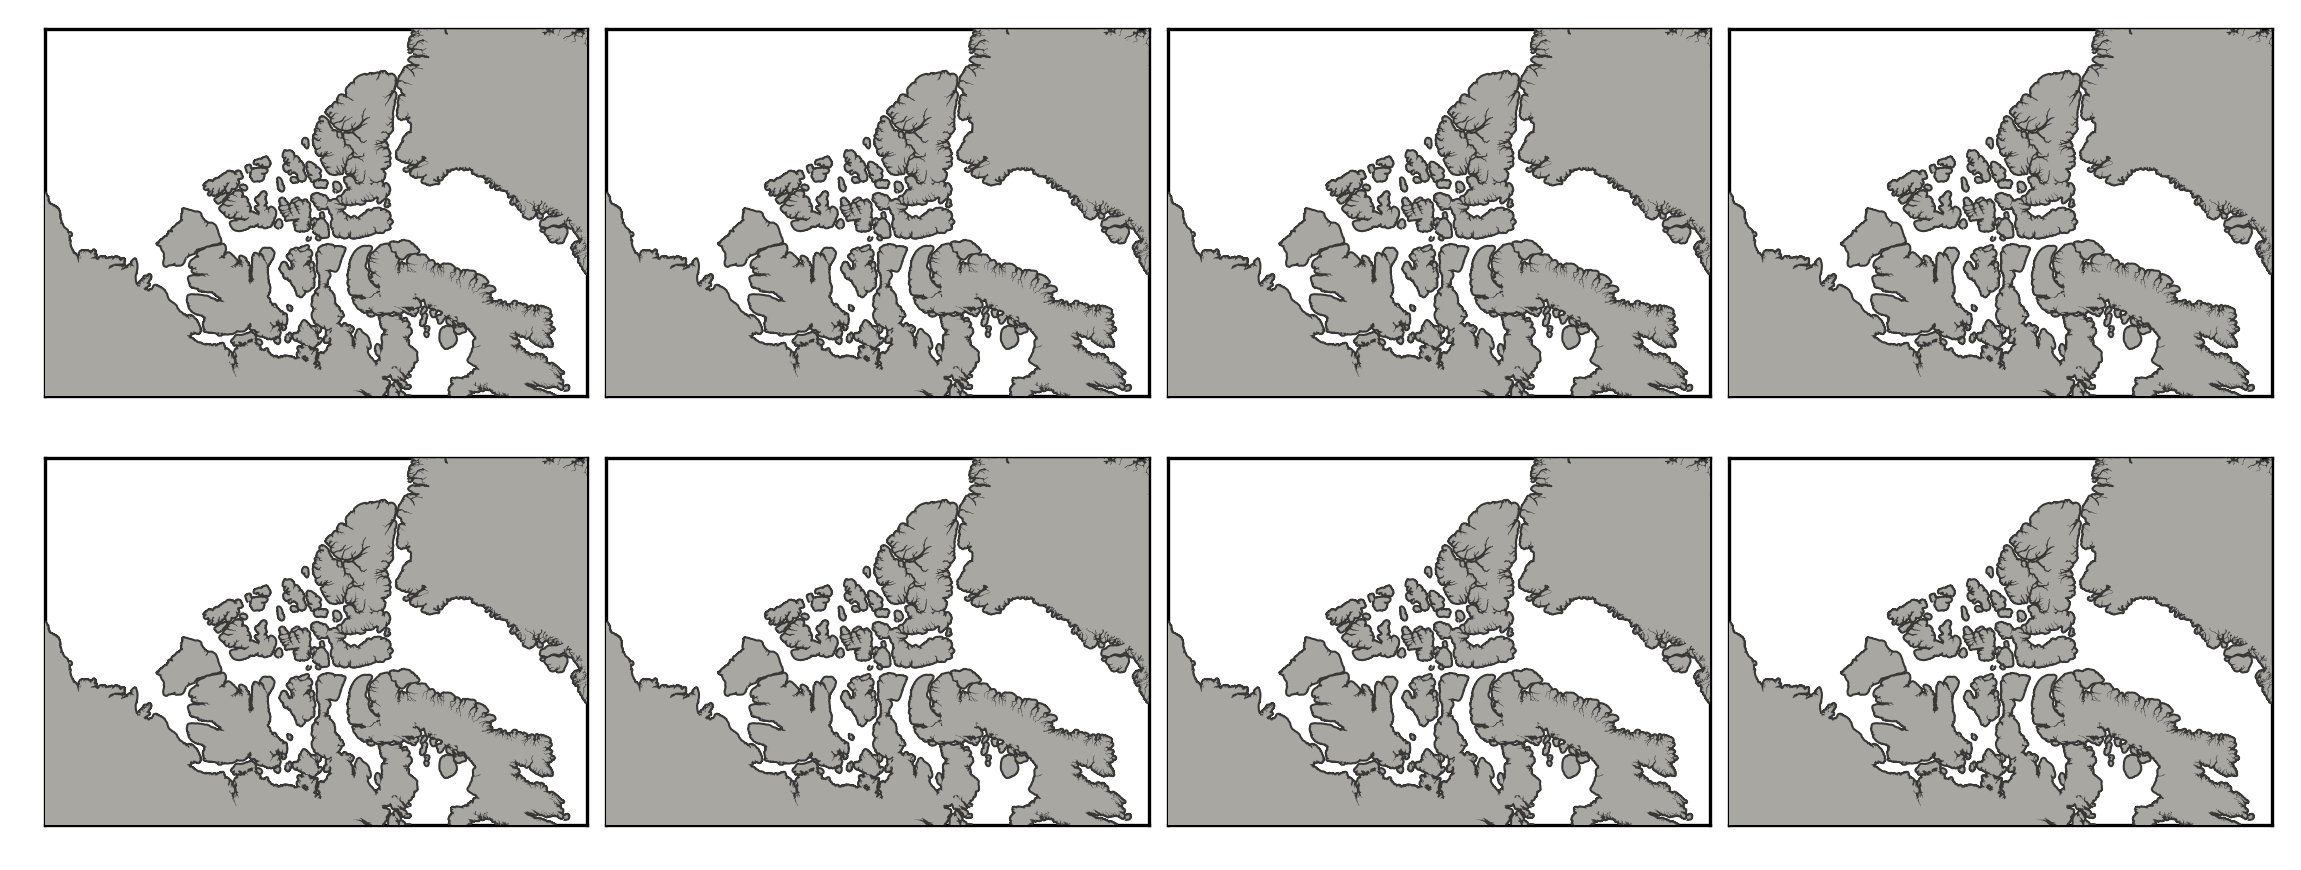

In [6]:
fig, ax = plt.subplots(2,4,figsize=(7.5, 3), dpi=300)

for axis in ax.ravel():
    proj1 = Basemap(projection='stere',lat_0 = 76, lon_0 = -96, resolution='i', width=3.4e6, height=2.3e6, ax=axis)
    proj1.drawcoastlines(color=land_outline_color, linewidth=1.0, zorder=4)
    proj1.fillcontinents(color=land_color, lake_color=land_color, zorder=5)
    
fig.tight_layout(pad=0.1)

# pickle the class instance.
pickle.dump((fig, ax, proj1), open('/ocean/brogalla/GEOTRACES/pickles/side-by-side-CAA.pickle','wb'))